In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv(r'C:\Users\xj537\Documents\GoodGoodStudy\Graduate\Fixed Income Quant Trading\Assignments\Ass2\USTREASURY-YIELD.csv',index_col='Date')

In [5]:
df = df.drop('1 MO',axis = 1)
df.index = pd.to_datetime(df.index)

In [6]:
Sample1 = df['2012':'2015']
print(Sample1.head(3))
print(Sample1.tail(3))

            3 MO  6 MO  1 YR  2 YR  3 YR  5 YR  7 YR  10 YR  20 YR  30 YR
Date                                                                     
2012-01-03  0.02  0.06  0.12  0.27   0.4  0.89  1.41   1.97   2.67   2.98
2012-01-04  0.02  0.06  0.12  0.25   0.4  0.89  1.43   2.00   2.71   3.03
2012-01-05  0.02  0.07  0.11  0.27   0.4  0.88  1.43   2.02   2.74   3.06
            3 MO  6 MO  1 YR  2 YR  3 YR  5 YR  7 YR  10 YR  20 YR  30 YR
Date                                                                     
2015-12-29  0.23  0.50  0.67  1.09  1.38  1.81  2.12   2.32   2.69   3.04
2015-12-30  0.21  0.47  0.64  1.08  1.36  1.80  2.14   2.31   2.69   3.04
2015-12-31  0.16  0.49  0.65  1.06  1.31  1.76  2.09   2.27   2.67   3.01


In [7]:
Sample1_ret = Sample1.diff().dropna()
print(Sample1_ret.head(3))
print(Sample1_ret.tail(3))

            3 MO  6 MO  1 YR  2 YR  3 YR  5 YR  7 YR  10 YR  20 YR  30 YR
Date                                                                     
2012-01-04   0.0  0.00  0.00 -0.02   0.0  0.00  0.02   0.03   0.04   0.05
2012-01-05   0.0  0.01 -0.01  0.02   0.0 -0.01  0.00   0.02   0.03   0.03
2012-01-06   0.0 -0.02  0.01 -0.02   0.0 -0.02 -0.03  -0.04  -0.04  -0.04
            3 MO  6 MO  1 YR  2 YR  3 YR  5 YR  7 YR  10 YR  20 YR  30 YR
Date                                                                     
2015-12-29  0.00 -0.01  0.01  0.04  0.05  0.08  0.07   0.08   0.10   0.09
2015-12-30 -0.02 -0.03 -0.03 -0.01 -0.02 -0.01  0.02  -0.01   0.00   0.00
2015-12-31 -0.05  0.02  0.01 -0.02 -0.05 -0.04 -0.05  -0.04  -0.02  -0.03


In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca.fit(Sample1_ret)
f= pca.components_ #PCA analysis components
var_ratio = np.cumsum(np.round(pca.explained_variance_ratio_,decimals = 5)) #pca explained variance ratio

In [9]:
print('componets:',f)
print('var_ratio:',var_ratio)

componets: [[ 0.01233575  0.0169508   0.0442175   0.16300775  0.25360006  0.38588999
   0.44680445  0.43904734  0.43633856  0.41835581]
 [ 0.03522316  0.07160778  0.13545912  0.41801319  0.5017714   0.37678877
   0.14606942 -0.1044392  -0.39393714 -0.46837255]
 [ 0.5065613   0.57523594  0.43095561  0.26316157  0.0326546  -0.21483626
  -0.23716024 -0.06036315  0.10636891  0.19773349]
 [ 0.4125768   0.32227626 -0.03019416 -0.6630375  -0.1071609   0.22206667
   0.32903336  0.15343987 -0.13896641 -0.27105814]
 [-0.5024806   0.01561248  0.81650218 -0.245483   -0.07930413  0.01179512
   0.09477881  0.04005756 -0.04627548 -0.03427056]
 [ 0.2025303  -0.33484134  0.11607148 -0.44210009  0.70113139 -0.07833637
  -0.24796213 -0.17246051  0.04144526  0.21741737]
 [-0.52466547  0.66614062 -0.32802441 -0.17481243  0.31256688  0.0170517
  -0.14867086 -0.10486528  0.08817122  0.06293397]
 [ 0.04107038 -0.00404152  0.03334741 -0.04476764 -0.26828752  0.67972769
  -0.15146573 -0.56332302 -0.0418957   0.

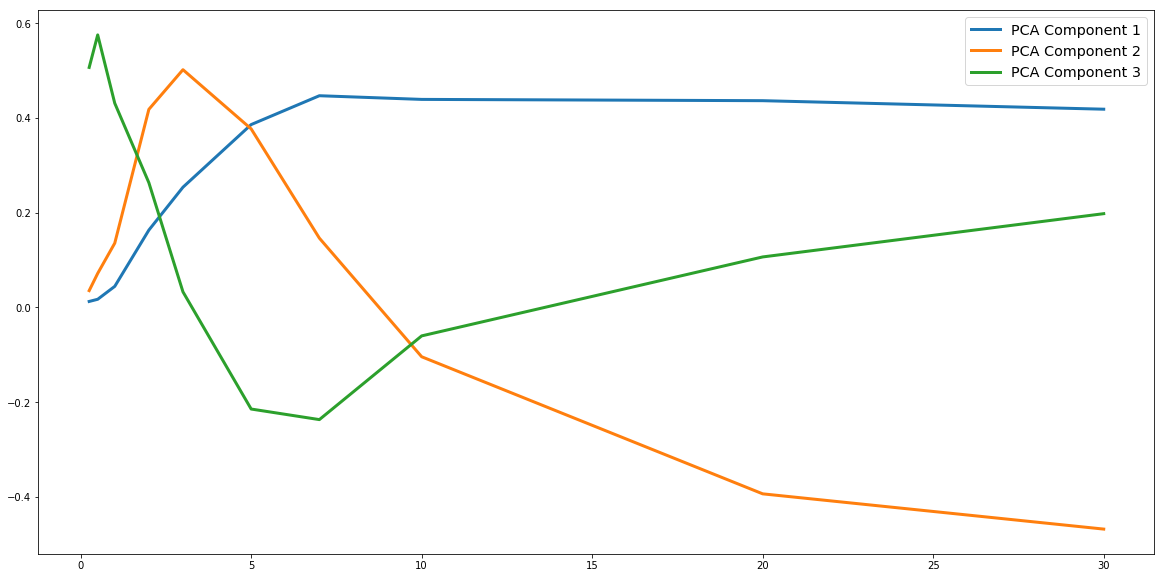

In [201]:
fig = plt.figure(figsize = (20,10)) # plot first 3 PCA componets
x = [3/12,6/12,1,2,3,5,7,10,20,30] #maturities
for i in range(3):
    plt.plot(x,f[i],label = 'PCA Component %d'%(i+1),linewidth = 3)
plt.legend(loc = 'best',fontsize='x-large')
plt.show()

In [197]:
def pcaexpl(frame,dts,cpnts,n):         # compute and plot rate curve move explained by first n PCA components
    fig = plt.figure(figsize = (20,10))
    x = [3/12,6/12,1,2,3,5,7,10,20,30]  # maturities
    move = frame.loc[dts[1]]-frame.loc[dts[0]]  # rate curve move  
    plt.plot(x, move, label = 'Actual Move', linewidth = 5)
    expl = []
    for i in range(n):
        expl.append(np.dot(cpnts[i],move)/(np.linalg.norm(cpnts[i])**2)*cpnts[i]) # project move onto ith PCA component
        if i > 0:
            expl[i] = expl[i]+expl[i-1] # project move onto first i PCA components
        plt.plot(x,expl[i],label = 'Move Explained by First %d Components' % (i+1) ,linewidth = 2)
    plt.legend(loc = 'best',fontsize='x-large')
    plt.show()

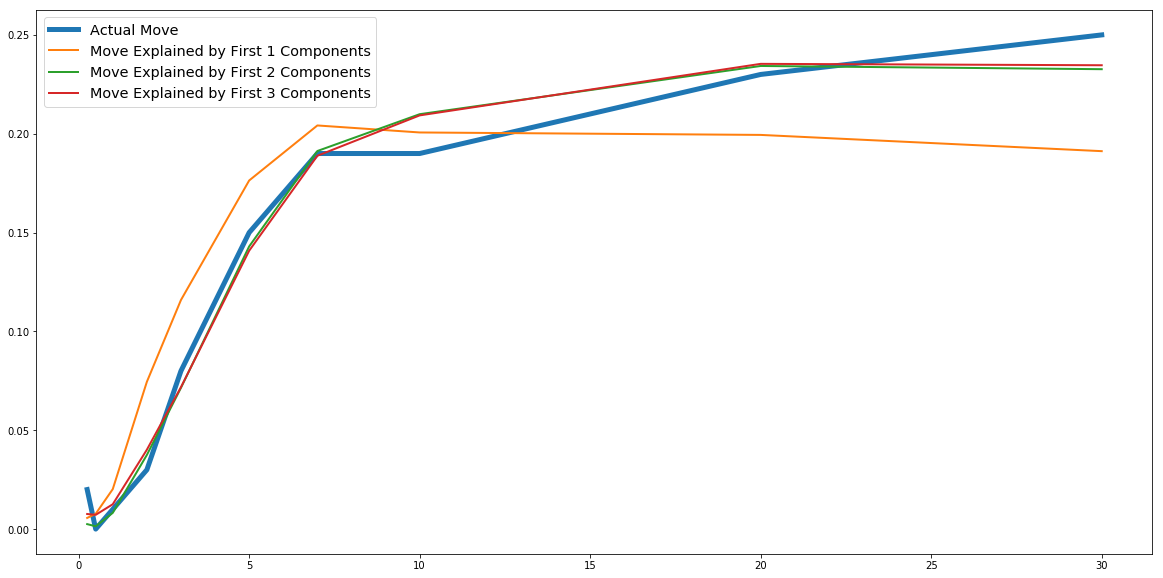

In [198]:
dts = ['11/8/2016','11/9/2016']
pcaexpl(df,dts,f,3)

In [13]:
'''
Some explanation here :
To analyze how PCA components can explain rate curve move, we project curve move from 11/8/2016 to 11/9/2016 onto first PCA
component vector, second component, and third one. We add 1st and 2nd projection to explain move by first 2 components and,
similarly, add 1st, 2nd and 3nd projection to explain move by first 3 components. 
The figure shows out result. Actually the 1st component can roughly explain the curve move well. However, it cannot explain
the slope of the curve well. And the 2nd component make up for that well. Adding the 3rd one make it more close to actual move
curve. We can imagine that when we use more components, the explanation curve will converge to actual move. And after we test 
pcaexpl(df,dts,f,10), we find it does converge.
'''

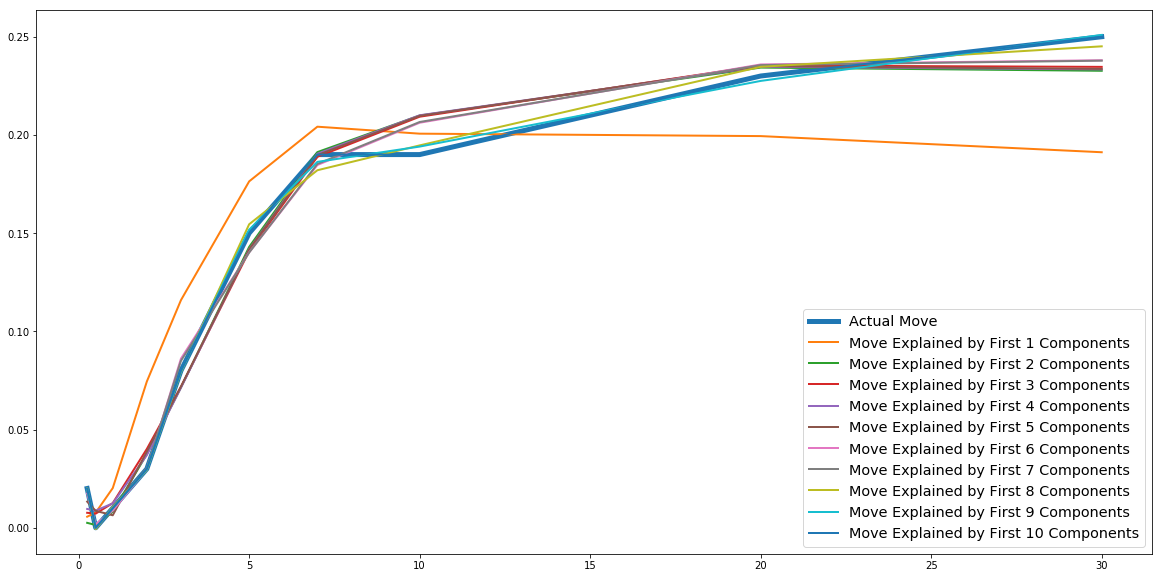

In [199]:
pcaexpl(df,dts,f,10)

In [178]:
'''
The loading of 5-year,7-year and 10-year in ith PCA components is li5, li6 and li7, correspondingly. Thus, to have a portfolio 
WFLY(w1*5Y - 7Y + w2*10Y) that doesn't have PCA 1,2 risk exposure, we need to make sure w1 and w2 satisfly the following two 
equations.
l15*w1 - l16 + l17*w2 = 0 and l25*w1 - l26 + l27*w2 = 0
let's solve this in a matrix way which means solving A*w = B.
'''

"\nAnswer for 2-d:\nThe loading of 5-year,7-year and 10-year in ith PCA components is li5, li6 and li7, correspondingly. Thus, to have a portfolio \nWFLY(w1*5Y - 7Y + w2*10Y) that doesn't have PCA 1,2 risk exposure, we need to make sure w1 and w2 satisfly the following two \nequations.\nl15*w1 - l16 + l17*w2 = 0 and l25*w1 - l26 + l27*w2 = 0\nlet's solve this in a matrix way which means solving A*w = B.\n"

In [71]:
A = np.array([[f[0][5],f[0][7]],[f[1][5],f[1][7]]])
print(np.linalg.det(A))
B = np.array([[f[0][6]],[f[1][6]]])
w_pca = np.linalg.inv(A).dot(B)
w_pca = [w_pca[0][0],-1,w_pca[1][0]]
print("PCA weights:")
print(w_pca) # w_pca is weights so w5y = 0.5385 and w10y = 0.5443 when w7y = -1

-0.20573014657260777
PCA weights:
[0.5385467006845602, -1, 0.5443255290237164]


In [72]:
import statsmodels.api as sm

In [158]:
def CCA_Chou_Ng(data_set):
    
    #data_set is pandas dataframe
    df_lag = data_set.shift(1).dropna()
    df = data_set.drop(data_set.index[0]).dropna()
    n = len(data_set.columns)
    
    #X(t) ~ M_1 + X(t-1)
    X = df_lag.as_matrix()
    X_I = sm.add_constant(X) #assure there is a constant term
    Y = df.as_matrix()
    l1 = sm.OLS(Y,X_I).fit()
    B=l1.params[1:(n+1)]
    
    #X(t-1) ~ M_2 + X(t)
    Y_I = sm.add_constant(X)
    l2 = sm.OLS(X,Y_I).fit()
    A=l2.params[1:(n+1)]
    C = np.dot(A,B)
    eig_val, eig_vec = np.linalg.eig(C)
    return eig_val, eig_vec, C # Notice each column rather than row in eig_vec is an eigenvector 

In [159]:
flylist = ['5 YR','7 YR','10 YR']
flySample = Sample1[flylist]
val1,vec1,C = CCA_Chou_Ng(flySample)
print(val1)
print(vec1)

[0.88202284 0.99325733 0.99812972]
[[ 0.52162969  0.38796514 -0.32238471]
 [-0.77559463 -0.89783475 -0.62515133]
 [ 0.3554651   0.20826862  0.71081215]]


In [75]:
w_cca1 = [-vec1[0][0]/vec1[1][0],-1,-vec1[2][0]/vec1[1][0]]
print("Chou & Ng CCA weights:")
print(w_cca1)  #w_cca1 is weights by Chou & Ng. w5y = 0.6726, w10y = 0.4583 when w7y = -1

Chou & Ng CCA weights:
[0.6725545388871585, -1, 0.4583129947761869]


In [162]:
def CCA_Box_Tiao(data_set):
    # data_set is pandas dataframe
    # 1-order autoregressive here. X(t) = Beta * X(t-1) + b(t) 
    data_set_demean = data_set - data_set.mean() 
    df_lag = data_set_demean.shift(1).dropna()
    df = data_set_demean.drop(data_set.index[0]).dropna()
    X = df_lag.as_matrix()
    Y = df.as_matrix()
    l = sm.OLS(Y,X).fit()
    B=l.params  # Autoregress parameter
    Cov = data_set_demean.cov()
    Q = np.linalg.inv(Cov).dot(B.T).dot(Cov).dot(B)
    eig_val, eig_vec = np.linalg.eig(Q)
    return eig_val,eig_vec,Q

In [163]:
val2,vec2,Q = CCA_Box_Tiao(flySample)
print(val2)
print(vec2)

[0.77756233 0.99817261 0.98516875]
[[-0.52024737  0.35223692 -0.5457792 ]
 [ 0.77550868  0.49436352  0.78970694]
 [-0.35767157 -0.79469105  0.28015713]]


In [165]:
w_cca2 = [-vec2[0][0]/vec2[1][0],-1,-vec2[2][0]/vec2[1][0]]
print("Box & Tiao CCA weights: ")
print(w_cca2)  #w_cca1 is weights by Box & Tiao. w5y = 0.6708, w10y = 0.4612 when w7y = -1

Box & Tiao CCA weights: 
[0.6708466062960617, -1, 0.4612089844701355]


In [166]:
WFLY1 = flySample.dot(w_pca)   # Portfolio with weights that PCA analysis gives us
WFLY2 = flySample.dot(w_cca1)   # Portfolio with weights that CCA by Chou&Ng gives us
WFLY3 = flySample.dot(w_cca2)   # Portfolio with weights that CCA by Box&Tiao gives us

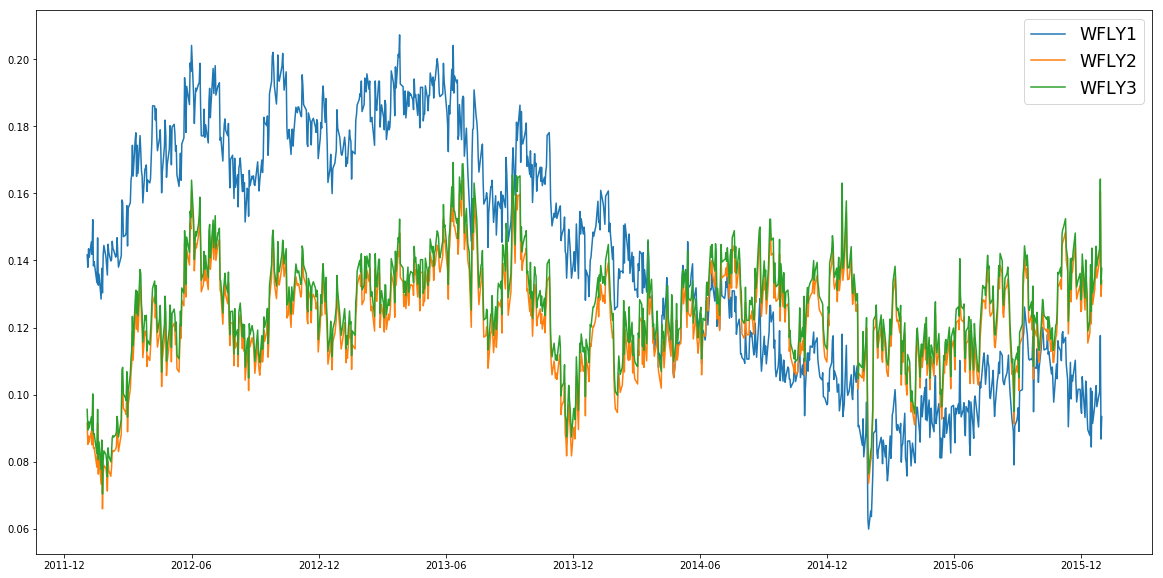

In [195]:
fig = plt.figure(figsize = (20,10))
plt.plot(WFLY1,label='WFLY1')
plt.plot(WFLY2,label='WFLY2')
plt.plot(WFLY3,label='WFLY3')
plt.legend(loc='best',fontsize='xx-large')
plt.show()

In [168]:
# Perform unit root test (ADF statistic)
from statsmodels.tsa.stattools import adfuller as adf
adf1 = adf(WFLY1,autolag='t-stat') # ADF test
adf2 = adf(WFLY2,autolag='t-stat')
adf3 = adf(WFLY3,autolag='t-stat')
adftest = pd.DataFrame([[adf1[0],adf1[1]],[adf2[0],adf2[1]],[adf3[0],adf3[1]]],index=['WFLY1','WFLY2','WFLY3'],
                       columns=['adf_stats','p_Value']) # Columns are adf statistic and pValue
print(adftest)
# We can find that p Value of WFLY2 and WFLY3 are very close to zero, which means they are stationary, while WFLY1 is not.

       adf_stats   p_Value
WFLY1  -0.626644  0.864847
WFLY2  -5.078108  0.000016
WFLY3  -5.094332  0.000014


In [174]:
def half_life(data_srs):
    # data_set is pandas Series
    # Assume data_set follows an O-U process: dX = lambda*(X_bar-X)dt+sigma*dW
    data_srs_demean = data_srs - data_srs.mean()
    df_lag = data_srs_demean.shift(1).dropna()
    df = data_srs_demean.drop(data_srs.index[0]).dropna()
    lambdaa = -np.log(np.dot(df,df_lag)/np.dot(df,df)) # estimate lambda in O-U process
    hl = np.log(2)/lambdaa
    return hl # Here hl is in scale of days

In [175]:
hl1 = half_life(WFLY1)
hl2 = half_life(WFLY2)
hl3 = half_life(WFLY3)
hl = pd.DataFrame([hl1,hl2,hl3],index=['WFLY1','WFLY2','WFLY3'],columns=['Half_life'])
print(hl)

       Half_life
WFLY1  33.213290
WFLY2   5.665631
WFLY3   5.656406


In [176]:
# Perform ADF test and half life calculation out-of-sample
Out_of_Sample_list = ['1/1/2016','3/31/2016','6/30/2016','12/31/2016']
w_list = [w_pca, w_cca1, w_cca2]
print('Out-of-Sample test:')
for ele in Out_of_Sample_list[1:4]:  # loops on date periods
    Out_of_Sample = df[Out_of_Sample_list[0]:ele][flylist]
    Results = pd.DataFrame([],index=['WFLY1','WFLY2','WFLY3'],columns=['adf_stats','p_Value','Half_life'])
    for i in range(len(w_list)):  # loops on WFLY portfolios
        wfly = Out_of_Sample.dot(w_list[i])
        adf_result = adf(wfly,autolag='t-stat')
        hl_result = half_life(wfly)
        Results.iloc[i] = [adf_result[0],adf_result[1],hl_result]
    print('%s - %s :' %(Out_of_Sample_list[0],ele))
    print(Results)

Out-of-Sample test:
1/1/2016 - 3/31/2016 :
      adf_stats   p_Value Half_life
WFLY1  -1.60916   0.47899   1.56278
WFLY2  -1.95632  0.306049   2.42088
WFLY3  -1.94253  0.312327   2.48272
1/1/2016 - 6/30/2016 :
      adf_stats    p_Value Half_life
WFLY1  -1.13232   0.702011   1.47381
WFLY2  -2.74329  0.0668419   2.49001
WFLY3  -2.70803  0.0726586   2.54877
1/1/2016 - 12/31/2016 :
       adf_stats   p_Value Half_life
WFLY1   -1.24529  0.653817   6.66069
WFLY2   0.103137  0.966275   10.4884
WFLY3  0.0982649  0.965942   10.7231


In [ ]:
'''

We find that CCA decompostion portfolio in sample are all stationary. However, out of sample test shows these  
combinations are not stationary out of sample. 

'''